# Model Building :

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Classification metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [5]:
# Machine Learning tools
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [6]:
import pickle

In [7]:
# Display all columns
pd.set_option('display.max_columns', None)

In [8]:
train = pd.read_csv("..\\Data\\UNSW_NB15_training-set.csv")
train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0


## 1 - Handle categorical data :

In [9]:
cat_data = train.loc[:,train.dtypes == np.object]
num_data = train.loc[:,train.dtypes != np.object]

In [10]:
# Numerical data
num_data

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
1,2,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
2,3,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0
3,4,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
4,5,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,0
82328,82329,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,0
82329,82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,0
82330,82331,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,0


In [11]:
# Categorical data
cat_data

,proto,service,state,attack_cat
0,udp,-,INT,Normal
1,udp,-,INT,Normal
2,udp,-,INT,Normal
3,udp,-,INT,Normal
4,udp,-,INT,Normal
...,...,...,...,...
82327,udp,-,INT,Normal
82328,tcp,-,FIN,Normal
82329,arp,-,INT,Normal
82330,arp,-,INT,Normal


In [12]:
# Tranform cat data to num data
oe = OrdinalEncoder()
conv_cat_data = pd.DataFrame(oe.fit_transform(cat_data), columns=cat_data.columns)

In [13]:
# Category correspondant number
classes = oe.categories_
for i in range(len(classes)):
    classes[i] = list(zip(classes[i],np.arange(1,len(classes[i])+1))) 
classes = pd.DataFrame(classes).transpose()
classes.columns = cat_data.columns
classes

,proto,service,state,attack_cat
0,"(3pc, 1)","(-, 1)","(ACC, 1)","(Analysis, 1)"
1,"(a/n, 2)","(dhcp, 2)","(CLO, 2)","(Backdoor, 2)"
2,"(aes-sp3-d, 3)","(dns, 3)","(CON, 3)","(DoS, 3)"
3,"(any, 4)","(ftp, 4)","(FIN, 4)","(Exploits, 4)"
4,"(argus, 5)","(ftp-data, 5)","(INT, 5)","(Fuzzers, 5)"
...,...,...,...,...
126,"(wsn, 127)",None,None,None
127,"(xnet, 128)",None,None,None
128,"(xns-idp, 129)",None,None,None
129,"(xtp, 130)",None,None,None


In [14]:
# Converted categorical data
conv_cat_data

,proto,service,state,attack_cat
0,117.0,0.0,4.0,6.0
1,117.0,0.0,4.0,6.0
2,117.0,0.0,4.0,6.0
3,117.0,0.0,4.0,6.0
4,117.0,0.0,4.0,6.0
...,...,...,...,...
82327,117.0,0.0,4.0,6.0
82328,111.0,0.0,3.0,6.0
82329,6.0,0.0,4.0,6.0
82330,6.0,0.0,4.0,6.0


In [15]:
# Concatenate numerical data and converted categorical data
df = pd.concat([num_data, conv_cat_data], axis=1)
df

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto,service,state,attack_cat
0,1,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,117.0,0.0,4.0,6.0
1,2,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,117.0,0.0,4.0,6.0
2,3,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0,117.0,0.0,4.0,6.0
3,4,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0,117.0,0.0,4.0,6.0
4,5,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0,117.0,0.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,0,117.0,0.0,4.0,6.0
82328,82329,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,0,111.0,0.0,3.0,6.0
82329,82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,0,6.0,0.0,4.0,6.0
82330,82331,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,0,6.0,0.0,4.0,6.0


## 2 - Machine Learning :

In [16]:
X = df.drop(columns=['id','label','attack_cat'])
y = df['label']

### 1 - Dimensionality Reduction :

In [17]:
best = ExtraTreesClassifier()
best.fit(X,y)
feat = pd.Series(best.feature_importances_, index=X.columns)

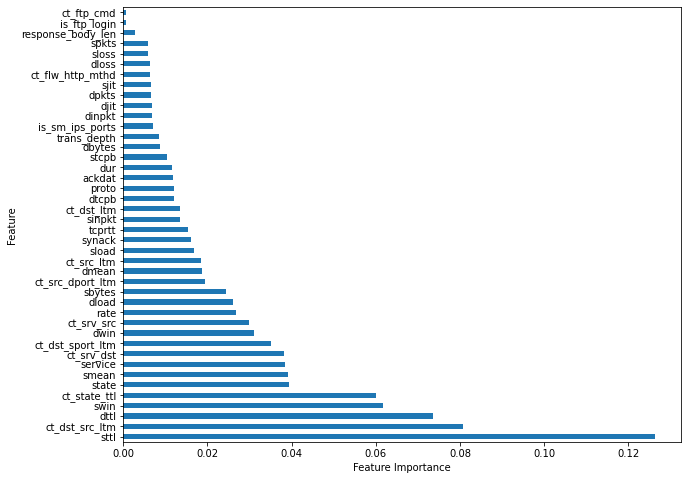

In [18]:
# Feature importance
plt.figure(figsize=(10,8))
feat.nlargest(len(feat)).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [19]:
# So we will take just the top 20,  because too much features can perturb the model
Xbest = list(feat.nlargest(20).index)
print(Xbest)

['sttl', 'ct_dst_src_ltm', 'dttl', 'swin', 'ct_state_ttl', 'state', 'smean', 'service', 'ct_srv_dst', 'ct_dst_sport_ltm', 'dwin', 'ct_srv_src', 'rate', 'dload', 'sbytes', 'ct_src_dport_ltm', 'dmean', 'ct_src_ltm', 'sload', 'synack']


In [20]:
X = X[Xbest]
X

,sttl,ct_dst_src_ltm,dttl,swin,ct_state_ttl,state,smean,service,ct_srv_dst,ct_dst_sport_ltm,dwin,ct_srv_src,rate,dload,sbytes,ct_src_dport_ltm,dmean,ct_src_ltm,sload,synack
0,254,2,0,0,2,4.0,248,0.0,2,1,0,2,90909.090200,0.000000,496,1,0,1,1.803636e+08,0.000000
1,254,2,0,0,2,4.0,881,0.0,2,1,0,2,125000.000300,0.000000,1762,1,0,1,8.810000e+08,0.000000
2,254,3,0,0,2,4.0,534,0.0,3,1,0,3,200000.005100,0.000000,1068,1,0,1,8.544000e+08,0.000000
3,254,3,0,0,2,4.0,450,0.0,3,1,0,3,166666.660800,0.000000,900,2,0,2,6.000000e+08,0.000000
4,254,3,0,0,2,4.0,1063,0.0,3,1,0,3,100000.002500,0.000000,2126,2,0,2,8.504000e+08,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,254,2,0,0,2,4.0,52,0.0,1,1,0,1,200000.005100,0.000000,104,1,0,2,8.320000e+07,0.000000
82328,254,1,252,255,1,3.0,903,0.0,2,1,255,1,24.410067,2242.109863,18062,1,44,3,1.241044e+05,0.100191
82329,0,1,0,0,2,4.0,46,0.0,1,1,0,1,0.000000,0.000000,46,1,0,1,0.000000e+00,0.000000
82330,0,1,0,0,2,4.0,46,0.0,1,1,0,1,0.000000,0.000000,46,1,0,1,0.000000e+00,0.000000


### 2 - Train Test Split :

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [22]:
# Shapes
print("X_train shape :",X_train.shape)
print("X_test shape :",X_test.shape)
print("y_train shape :",y_train.shape)
print("y_test shape :",y_test.shape)

X_train shape : (74098, 20)
X_test shape : (8234, 20)
y_train shape : (74098,)
y_test shape : (8234,)


In [23]:
# We have set test_size to 0.1 because data size is large, and 10 % size for test set is enough.

### 3 - Cross Validation :

In [24]:
models={'Logistic Regression' : LogisticRegression(),
        'KNN' : KNeighborsClassifier(),
        'DecisionTree Classifier':DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=11),
        'RandomForest Classifier':RandomForestClassifier()
       }

We will evaluate our models with <strong>recall</strong> metric, because malware activities are too dangerous and should be detected by the model.

In [25]:
for name,model in models.items() :
    cvm = cross_val_score(model,X_train, y_train, cv=5, scoring='recall').mean()
    print(name,':')
    print('Cross validation recall score :',(cvm*100).round(2),'%')
    print('-'*30)

Logistic Regression :
Cross validation recall score : 70.25 %
------------------------------
KNN :
Cross validation recall score : 89.68 %
------------------------------
DecisionTree Classifier :
Cross validation recall score : 96.42 %
------------------------------
RandomForest Classifier :
Cross validation recall score : 97.61 %
------------------------------


So RandomForest gives us the best results in cross validation for recall score, so we will choose it to predict wether an activity is normal or not.

### 3 - Final Model :

In [26]:
# Fit the model
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
# Evaluate the model
def eval(model, X,y):
    y_pred = model.predict(X)
    rec = recall_score(y, y_pred)
    print("Recall score :",(rec*100).round(2),'%')
    print('-'*15)
    prec = precision_score(y, y_pred)
    print("Precision score :",(prec*100).round(2),'%')
    print('-'*15)
    f1 = f1_score(y, y_pred)
    print("F1 score :",(f1*100).round(2),'%')
    print('-'*15)
    acc = accuracy_score(y, y_pred)
    print("Accuracy score :",(acc*100).round(2),'%')
    # Plot confusion matrix :
    print('-'*15)
    print('Confusion Matrix :')
    plot_confusion_matrix(model, X, y)
    plt.show()

Recall score : 99.99 %
---------------
Precision score : 99.99 %
---------------
F1 score : 99.99 %
---------------
Accuracy score : 99.99 %
---------------
Confusion Matrix :


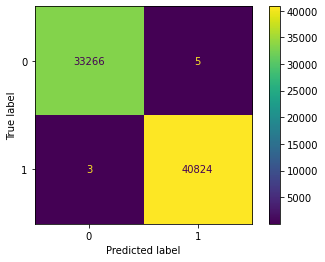

In [28]:
# On train set :
eval(model, X_train,y_train)

Recall score : 97.43 %
---------------
Precision score : 98.56 %
---------------
F1 score : 97.99 %
---------------
Accuracy score : 97.81 %
---------------
Confusion Matrix :


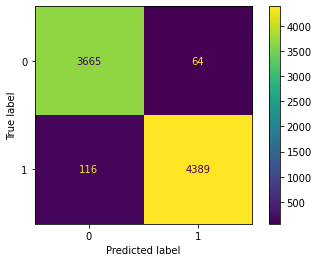

In [29]:
# On test set :
eval(model, X_test,y_test)

### 4 - Save the model :

In [30]:
pickle.dump(model,open('..\Model\detection_model.pkl','wb'))

### 5 - Bonus : Manipulating tresholds :

#### N.B : We are looking for 99% recall or more on the training set, so an anormal activity or a malware will be certainly detected.

In [31]:
# Returns the score for each predicted instance
y_scores = model.predict_proba(X_train)[:,1]

In [32]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, tresholds = precision_recall_curve(y_train, y_scores)

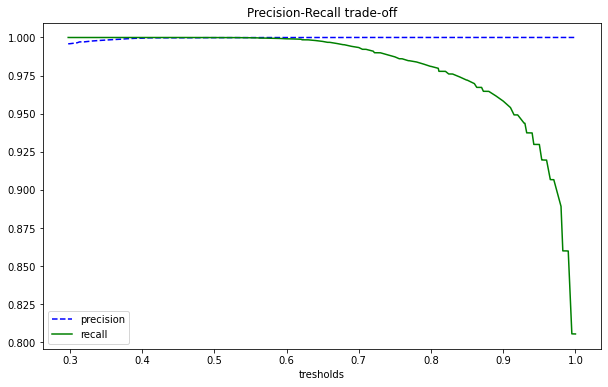

In [33]:
plt.figure(figsize=(10,6))
plt.plot(tresholds, precisions[:-1], 'b--',label='precision')
plt.plot(tresholds, recalls[:-1], 'g-',label='recall')
plt.xlabel('tresholds')
plt.title('Precision-Recall trade-off')
plt.legend()
plt.show()

In [34]:
# Treshold wich gives us 98% on recall
treshold_99_recall = tresholds[np.argmin(recalls > 0.999999)]
print("The treshold wich gonna gives us 98% recall on the training set :",treshold_99_recall)

The treshold wich gonna gives us 98% recall on the training set : 0.3


In [35]:
# New Precision and Recall score on training set
y_train_pred_99_recall = (y_scores >= treshold_99_recall)
rec = recall_score(y_train, y_train_pred_99_recall)
print("New recall score on training set :", (rec*100).round(2),'%')
pre = precision_score(y_train, y_train_pred_99_recall)
print("New precision score on training set :", (pre*100).round(2),'%')
mat = confusion_matrix(y_train,y_train_pred_99_recall)
print('New Confusion Matrix :\n',mat)

New recall score on training set : 100.0 %
New precision score on training set : 99.59 %
New Confusion Matrix :
 [[33103   168]
 [    1 40826]]


In [36]:
## Prediction function based on a specific treshold using predict_proba
def predict_99_recall_pb(model,X,th):
    y_pred = model.predict_proba(X)[:,1]
    for i in range(len(y_pred)):
        if y_pred[i] <= th:
            y_pred[i] = 0
        else:
            y_pred[i] = 1
    return y_pred

In [37]:
## We will make our own predictions using the new treshold
y_pred_test = predict_99_recall_pb(model,X_test,treshold_99_recall)

In [38]:
# New precision and recall on test set
rec = recall_score(y_test, y_pred_test)
print("New recall score on test set :", (rec*100).round(2),'%')
pre = precision_score(y_test, y_pred_test)
print("New precision score on test set :", (pre*100).round(2),'%')
mat = confusion_matrix(y_test,y_pred_test)
print('New Confusion Matrix :\n',mat)

New recall score on test set : 98.53 %
New precision score on test set : 96.19 %
New Confusion Matrix :
 [[3553  176]
 [  66 4439]]


#### Conclusion :

We've reached a recall score close too 99% on the test set, So a malware will be certainly detected.